# Import the libraries

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

Load test and train data

In [253]:
df1=pd.read_csv("G:/Big Mart analytics/train.csv") #train data
df2=pd.read_csv("G:/Big Mart analytics/test.csv")  #test data
sub=pd.read_csv("G:/Big Mart analytics/sample.csv")  #sample submission file

Store Level Hypotheses:

City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
Population Density: Stores located in densely populated areas should have higher sales because of more demand.
Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
Competitors: Stores having similar establishments nearby should have less sales because of more competition.
Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

Product Level Hypotheses:

Brand: Branded products should have higher sales because of higher trust in the customer.
Packaging: Products with good packaging can attract customers and sell more.
Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
Advertising: Better advertising of products in the store will should higher sales in most cases.
Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

In [254]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [255]:
#see the null values in train and test data

In [256]:
df1.shape

(8523, 12)

<AxesSubplot:>

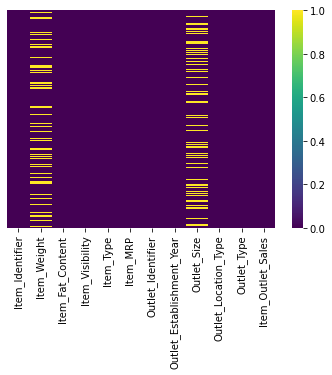

In [257]:
sns.heatmap(df1.isnull(),yticklabels=False, cmap='viridis')

<AxesSubplot:>

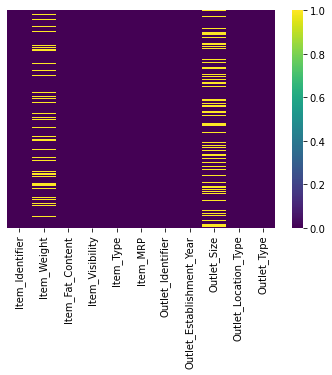

In [258]:
sns.heatmap(df2.isnull(),yticklabels=False, cmap='viridis')

<AxesSubplot:>

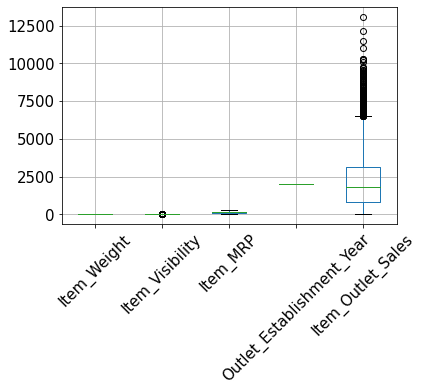

In [259]:
df1.boxplot( rot=45, fontsize=15)

<AxesSubplot:>

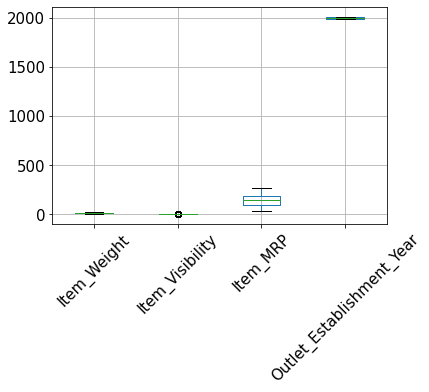

In [260]:
df2.boxplot( rot=45, fontsize=15)

In [261]:
#handling missing values of df1 data

In [262]:
'''categorical_feature=[feature for feature in df1.columns if df1[feature].dtypes=='O']
categorical_features_2=[feature for feature in df2.columns if df2[feature].dtype=='O']'''

"categorical_feature=[feature for feature in df1.columns if df1[feature].dtypes=='O']\ncategorical_features_2=[feature for feature in df2.columns if df2[feature].dtype=='O']"

In [263]:
df1['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [264]:
df1['Item_Weight'].fillna(df1['Item_Weight'].mean(),inplace=True)


In [265]:
df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode()[0],inplace=True)

In [266]:
#we fixed df1 data .now we fixes df2 data

In [267]:
df2['Item_Weight'].fillna(df2['Item_Weight'].mean(),inplace=True)
df2['Outlet_Size'].fillna(df2['Outlet_Size'].mode()[0],inplace=True)

In [268]:
#now we convert categorical features into numeric

<AxesSubplot:>

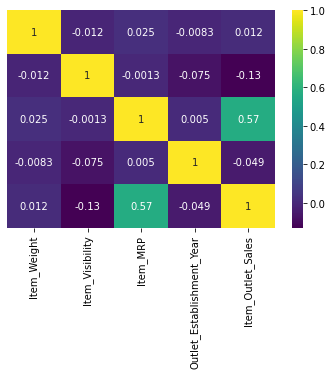

In [269]:
sns.heatmap(df1.corr(),yticklabels=False,annot=True ,cmap='viridis')

<AxesSubplot:>

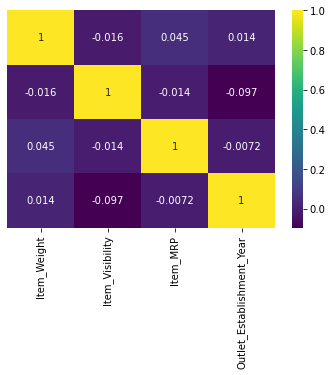

In [270]:
sns.heatmap(df2.corr(),yticklabels=False,annot=True ,cmap='viridis')

In [271]:
df1.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [272]:
df2.apply(lambda x: len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [274]:
#from above data we can say we have 10 outlet or store and 1559 unique products

In [282]:
categorical_feature=[feature for feature in df1.columns if df1[feature].dtypes=='O']
categorical_feature2=[feature for feature in df2.columns if df2[feature].dtype=='O']

In [283]:
for c in categorical_feature:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df1[c].value_counts())


Frequency of Categories for varible Outlet_Type
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Frequency of Categories for varible Outlet_Type
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Outlet_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_

In [285]:
for c in categorical_feature2:
    print('\nFrequency of Categories for varible %s'%col)
    print(df2[c].value_counts())


Frequency of Categories for varible Outlet_Type
DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: Item_Identifier, Length: 1543, dtype: int64

Frequency of Categories for varible Outlet_Type
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Outlet_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Type
OUT027    624
OUT013  

In [251]:
'''#Filter categorical variables
categorical_columns = [x for x in df1.dtypes.index if df1.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df1[col].value_counts())'''

"#Filter categorical variables\ncategorical_columns = [x for x in df1.dtypes.index if df1.dtypes[x]=='object']\n#Exclude ID cols and source:\ncategorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier']]\n#Print frequency of categories\nfor col in categorical_columns:\n    print ('\nFrequency of Categories for varible %s'%col)\n    print (df1[col].value_counts())"

In [286]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [291]:
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [292]:
df1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [289]:
df1['Item_Fat_Content']=df1['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})


In [293]:
df2['Item_Fat_Content']=df2['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [296]:
df2['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [298]:
#from sklearn.preprocessing import LabelEncoder
#lbl=LabelEncoder()
'''df1['Outlet_Type']=lbl.fit_transform(df1['Outlet_Type'])
df1['Outlet_Size']=lbl.fit_transform(df1['Outlet_Size'])
'''

"df1['Outlet_Type']=lbl.fit_transform(df1['Outlet_Type'])\ndf1['Outlet_Size']=lbl.fit_transform(df1['Outlet_Size'])\n"

In [299]:
'''# importing one hot encoder 
from  sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
ohe = OneHotEncoder()'''

'# importing one hot encoder \nfrom  sklearn.preprocessing import OneHotEncoder\n# creating one hot encoder object \nohe = OneHotEncoder()'

In [209]:
'''We apply One-Hot Encoding when:

The categorical feature is not ordinal (like the countries above)
The number of categorical features is less so one-hot encoding can be effectively applied

We apply Label Encoding when:

The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
 The number of categories is quite large as one-hot encoding can lead to high memory consumption'''

'We apply One-Hot Encoding when:\n\nThe categorical feature is not ordinal (like the countries above)\nThe number of categorical features is less so one-hot encoding can be effectively applied\n\nWe apply Label Encoding when:\n\nThe categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)\n The number of categories is quite large as one-hot encoding can lead to high memory consumption'

In [300]:
#now we convert all the categorical data into numeric by label encoder

In [301]:
from sklearn.preprocessing import LabelEncoder
categorical_feature
# process columns, apply LabelEncoder to categorical features
for c in categorical_feature:
    lbl = LabelEncoder() 
    lbl.fit(list(df1[c].values)) 
    df1[c] = lbl.transform(list(df1[c].values))

# shape        
print('Shape df1: {}'.format(df1.shape))

Shape df1: (8523, 12)


In [302]:
df1.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [305]:
from sklearn.preprocessing import LabelEncoder
categorical_feature2
# process columns, apply LabelEncoder to categorical features
for c in categorical_feature2:
    lbl = LabelEncoder() 
    lbl.fit(list(df2[c].values)) 
    df2[c] = lbl.transform(list(df2[c].values))

# shape        
print('Shape df2: {}'.format(df2.shape))

Shape df2: (5681, 11)


In [308]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [310]:
sub.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [311]:
df1.drop(['Item_Identifier','Outlet_Identifier'], axis=True, inplace=True)

In [312]:
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [314]:
df2.drop(['Item_Identifier','Outlet_Identifier'], axis=True, inplace=True)

In [315]:
df2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,2007,1,1,1
2,14.600000,0,0.099575,11,241.7538,1998,1,2,0
3,7.315000,0,0.015388,13,155.0340,2007,1,1,1
4,12.695633,1,0.118599,4,234.2300,1985,1,2,3


In [330]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [351]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=14)

In [352]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [353]:
model

LinearRegression()

In [354]:
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

In [355]:
from sklearn.metrics import mean_squared_error, r2_score

In [356]:
mse_test=mean_squared_error(y_test,y_pred)
mse_train=mean_squared_error(y_train,y_pred_train)

In [357]:
mse_test

1434239.2618306922

In [358]:
mse_train

1432478.1269616857

In [359]:
r2_score_test=r2_score(y_test,y_pred)
r2_score_train=r2_score(y_train,y_pred_train)

In [360]:
r2_score_test

0.5050219113733333

In [361]:
r2_score_train

0.509070214921616

In [376]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
cross_val_score(dtr, X_train, y_train, cv=10)

array([0.09043048, 0.11799015, 0.18234202, 0.31136144, 0.14458402,
       0.20406175, 0.19978077, 0.16010368, 0.12584561, 0.05269066])

In [386]:
y_pred=dtr.predict(X_test)
y_pred_train=dtr.predict(X_train)

In [387]:
r2_score_test=r2_score(y_test,y_pred)
r2_score_train=r2_score(y_train,y_pred_train)

In [393]:
from sklearn.ensemble import RandomForestRegressor
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [394]:
y_pred=rf.predict(X_test)
y_pred_train=rf.predict(X_train)

In [398]:
r2_score_test=r2_score(y_test,y_pred)
r2_score_train=r2_score(y_train,y_pred_train)

In [401]:
#getting submission file

In [402]:
sub.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [403]:
y_pred3 = model.predict(df2)

In [404]:
y_pred3

array([2002.01744521, 1338.98612465, 2157.27192921, ..., 1691.14824158,
       3382.45745269, 1126.38228024])

In [405]:
df=pd.DataFrame(y_pred3,columns=['Item_Outlet_Sales'])

In [407]:
df.head()

,Item_Outlet_Sales
0,2002.017445
1,1338.986125
2,2157.271929
3,2330.495087
4,5082.507659


In [408]:
sub['Item_Outlet_Sales']=df['Item_Outlet_Sales']
sub.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2002.017445
1,FDW14,OUT017,1338.986125
2,NCN55,OUT010,2157.271929
3,FDQ58,OUT017,2330.495087
4,FDY38,OUT027,5082.507659


In [410]:
sub.to_csv('G:/Big Mart analytics/submitted.csv',index=False)